# Marcadores ARUCO

## Deteção básica

In [1]:
import cv2
import cv2.aruco as aruco
import numpy as np 
import sys 

import matplotlib.pyplot as plt

In [6]:
frame_bgr = cv2.imread("aruco_frame.png")

In [7]:
frame = frame_bgr

In [8]:
 gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#--- Define the aruco dictionary
aruco_dict  = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
# parameters  = aruco.DetectorParameters_create()
# parameters.minDistanceToBorder = 0
# parameters.adaptiveThreshWinSizeMax = 1000

corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict) #, parameters=parameters)

for i in range(len(ids)):
    print('ID: {}'.format(ids[i]))

    print(type(corners[i]))
    print(corners[i].shape)


    for c in corners[i]: 
        for canto in c:
            print("Corner {}".format(canto))

for i in ids:
    print("ID i {}".format(i))



ID: [12]
<class 'numpy.ndarray'>
(1, 4, 2)
Corner [700. 363.]
Corner [778. 369.]
Corner [775. 439.]
Corner [699. 433.]
ID: [23]
<class 'numpy.ndarray'>
(1, 4, 2)
Corner [145. 423.]
Corner [231. 409.]
Corner [244. 480.]
Corner [160. 495.]
ID i [12]
ID i [23]


In [9]:
aruco.drawDetectedMarkers(frame, corners, ids);

In [10]:
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

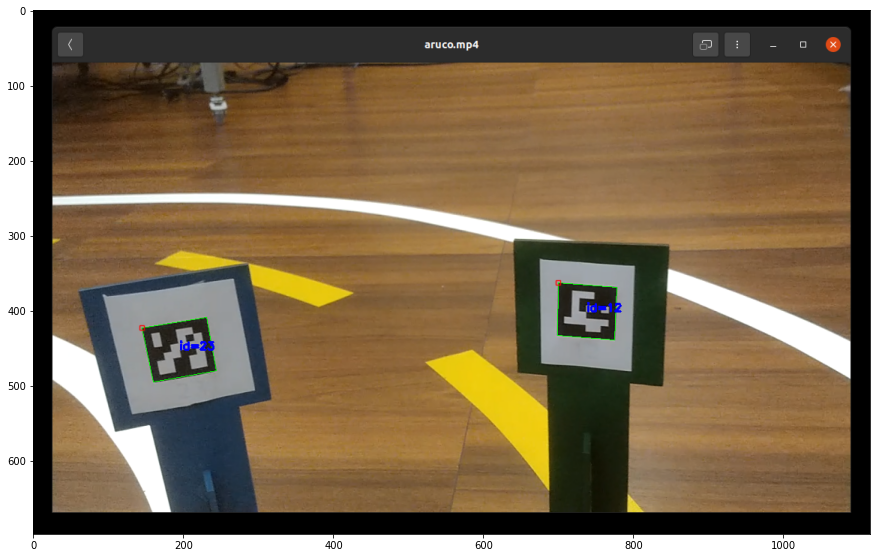

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(rgb)

Vamos explorar a estrutura *corners* 

In [12]:
corners

[array([[[700., 363.],
         [778., 369.],
         [775., 439.],
         [699., 433.]]], dtype=float32),
 array([[[145., 423.],
         [231., 409.],
         [244., 480.],
         [160., 495.]]], dtype=float32)]

Vemos que **corners** é uma lista, e que **cada corner** é um array. Notemos ainda que o **corner** sempre aparece ordenado a partir do ponto marcado em vermelho, e no sentido horário. 

In [13]:
ids

array([[12],
       [23]], dtype=int32)

Desta forma, se quisermos medir uma lateral do quadrado para ter uma ideia simples da dimensão do tamanho do marker, deveremos fazer a distância dos primeiros 2 pontos: 

In [14]:
index = 0 # Vamos pegar para o marker de ID 23

In [16]:
((corners[index][0][0][0] - corners[index][0][1][0])**2 + (corners[index][0][0][1] - corners[index][0][1][1])**2)**0.5

78.23042886243178

Portanto vemos que o marker com id 23 aparece com dimensão aproximada de $78$ pixels.